# Upper Confidence Bound Algorithm

Importer les librairies numpy, matplotlib.pyplot, pandas, math

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Choosing Actions

 
Initialisez number_ads (nombre de publicites a afficher). Dans l'absolu vous pouvez choisir le nombre que vous voulez et qui correspond au nombre d'entites que vous voulez tester. Ici le nombre ne devrait pas depasser 10 puisque notre fichier de simulation contient 10 colonnes). Mais vous pouvez ajouter plus de donnees a votre fichier si vous voulez.

In [62]:
number_ads = 10


## Environment

Importer le fichier 'Ads_CTR_Optimisation.csv'
Afficher les 5 premières lignes pour voir les données. 

In [111]:
simulation_data = pd.read_csv('Ads_CTR_Optimisation.csv')
simulation_data.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Ces donnees vont imiter l'environnement. Pour acceder a la reponse de l'environnement (ici le comportement des internautes

## Get Reward

Définissez une fonction qui vérifie si la publicité affichée a été cliquée ou pas. Elle va  chercher dans le dataset la valeur 0 ou 1 suivant le numéro d'internaute et le numéro de la publicité affichée. Vous pouvez utiliser une méthode dataset.values[row, column] de l'objet dataset.

In [112]:
def get_result_from_file(raw, column):
    return simulation_data.values[raw, column]
   

## Value functions

### Current value function

Définissez une fonction qui calcule le taux de click pour une publicité donnée. 
Il faut diviser le nombre de fois où cette publicité a été cliquée par le nombre de fois qu'elle a été affichée. Attention à la division par zéro !!!

In [113]:
def calcul_taux_de_click (ad_index):
    if number_of_display[ad_index] > 0 :
        return  number_of_clicks[ad_index] / number_of_display[ad_index]
    else :
        return (0)

### Expected value function

EXPECTED VALUE OF A = RACINE CARREE ( 3/2 * LOG (TOTAL EXPLORATIONS)  /  EXPLORATIONS OF A ) 

Définissez une fonction qui calcule l'intervalle de confiance (DELTA).
Attention à la division par zéro et au log de zéro !!!
Vous pouvez ajouter + 1 par exemple.

In [114]:
def calcul_delta (n, ad_index):
    return math.sqrt(3/2 * math.log(n + 1) / number_of_display[ad_index])

### Total value function ( ucb function )

TOTAL VALUE = CURRENT VALUE + EXPECTED VALUE. 

Dans le cas de UCB c'est vraiment simple: ucb = somme de TAUX DE CLICKS et de DELTA. Delta etant une valeur POSITIVE.

Comme vous voyez, l'algorithme est "optimiste". Il prend en compte uniquement combien on peut gagner en exploitant la piste, mais il ne prend pas en compte combien on peut perdre.

##### Ecrire une fonction qui calcule le UCB pour une publicité donnée.  Si le nombre d'affichages de la publicité donnée est égal à zéro, retourner 1e400.

In [115]:
def calcul_UCB (n, ad_index):
    if number_of_display[ad_index] > 0 :
        return (taux_de_click[ad_index] + calcul_delta (n, ad_index))
    else:
        return 1e400

## Iterations

Dans cet exercice, une iteration correspond a un seul affichage d'une publicite a un internaute donne. La decision concernant le choix de l'annonce publicitaire, prise par l'agent, est définitive, et elle ne peut pas etre "ameliorée" en faisant plusieurs essais. Vous ne pouvez pas donc afficher plusieurs annonces publicitaires a la meme personne pour tester si elle a cliquee ou pas. Une fois que l'action executee, le resultat de l'affichage (la recompense 0 ou 1) doit être enregistré.



##### Initialisez le nombre d'iterations N. C'est un nombre que vous pouvez choisir librement, mais il ne devrait pas depasser le nombre de lignes disponibles dans notre fichier de simulation de l'environnement = 10000.

=> Dans la vrai vie, N sera choisi en function de votre budget publicitaire et de la taille de votre population a cibler.

In [116]:
N = 10000

## Initial State

Initialisez les 4 variables ci-dessous sous forme de listes d'entiers stockant les resultats d'affichage (nombre d'affichage de chaque publicite, nombre de clicks de chaque publicite, le taux de clicks de chaque publicite, le ucb de chaque publicite)
Initialisez toutes les listes a zero, sauf ucb qui devrait etre initialise a 1e400, puis multipliez chaque liste par le nombre de publicités.

In [117]:
number_of_display = [0] * number_ads
number_of_clicks = [0] * number_ads
taux_de_click = [0] * number_ads
ucb = [1e400] * number_ads

## Current State

Ecrire une fonction qui met a jour tous les 4 tableaux ou l'agent enregistre les informations concernant son etat courant apres avoir affiche la publicite donnee et recuperer la recompense.

tableau d'affichages : incrementer de 1 pour la publicite qui vient d'etre affichee

tableau de clicks : incrementer si l'internaute a clique

tableau avec le taux : appeler une fonction

tableau avec les ucb : appeler une fonction


In [118]:
def update_current_state (iteration, last_ad_index, reward):
    number_of_display[last_ad_index] =+ 1
    number_of_clicks[last_ad_index] =+ reward
    taux_de_click[last_ad_index] = calcul_taux_de_click(last_ad_index)
    ucb[last_ad_index] = calcul_UCB(iteration, last_ad_index)

## UCB algo

Ecrivez le corps de l'algorithme, tel que vu en cours.

In [119]:
# pour chaque iteration = pour chaque internaute
for n in range(0, N):
    
    # initialiser l'index de la meilleure publicite et du meuilleur UCB a zero
    best_ad = 0
    best_UCB = 0.0

    ####   CHERCHER LA MEILLEURE ACTION (PUBLICITE A AFFICHER) #####
    
    # pour chaque publicite (action possible) 
    for i in range(0, number_ads):
        
        # comparer les ucb, et je garder l'index du meilleur ucb
        # trouver la meuilleure publicite a l'aide de cet index
        if ucb[i] > best_UCB:
            best_UCB = ucb[i]
            best_ad = i
           # print ("best ucb ", best_UCB )
           # print ("best add ", best_ad )
    
    ####  EXECUTER L'ACTION  ####
    # "afficher" Lla publicite et verifier le resultat d'affichage dans le fichier de simulation
    display_result = get_result_from_file(n, best_ad)
       
    ###### METTRE A JOUR LES ETATS ######  
    update_current_state(n, best_ad, display_result)
    
    # afficher le resultat obtenu ( nombre d'affichages et le nombre de clicks pour chaque publicite)    
    print ("nombre d'affichages a la fin ", number_of_display )
    print ("nombre de clicks a la fin ", number_of_clicks )

nombre d'affichages a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre d'affichages a la fin  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nombre de clicks a la fin  [1, 0, 0, 0, 0, 0, 0,

## Final Result

Calculer le nombre total d'affichages en faisant la somme de toutes les valeurs du tableau. Il devrait etre egal a votre nombre d'iterations. Par exemple 10000.

In [71]:
total_displays = sum(number_of_display)
total_displays

10000

Calculer le nombre total de clics obtenu en faisant la somme de toutes les valeurs du tableau number_of_clicks.

In [73]:
total_clicks = sum(number_of_clicks)
total_clicks

2195

Le resultat obtenu represente la recompense totale que vous avez voulu maximiser a l'aide de l'algorithme UCB. 

Si celui-ci est environ de 2000, félicitations !  
Maintenant vous pouvez visualiser les résultats.

## Visualisations

Visualisez le nombre d'affichages pour chaque publicite que l'algo a execute. 
(hint: la 5e publicité (=index 4) devrait être affichée environ 6.500 fois)

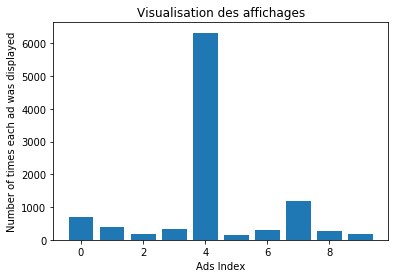

In [109]:
plt.bar(range(10), number_of_display)
plt.title('Visualisation des affichages')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed')
plt.show()

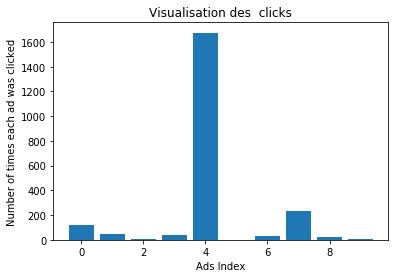

In [112]:
plt.bar(range(10), number_of_clicks)
plt.title('Visualisation des  clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was clicked')
plt.show()

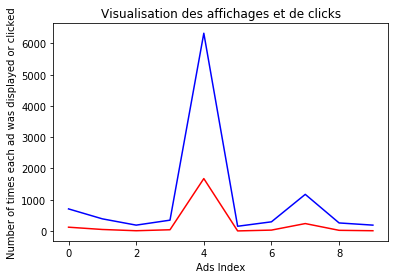

In [113]:
plt.plot(number_of_display, color="blue")
plt.plot(number_of_clicks, color="red")
plt.title('Visualisation des affichages et de clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed or clicked')
plt.show()

## Memoriser les etapes intermediaires

La proposition est d'enregistrer le nombre total des clicks pour chaque publicite et le nombre de fois que la publicite a ete affichee. Mais vous pouvez enregistrer plus d'informations si vous voulez.
Initialiser ces 2 listes pour sauvegarder l'historique des actions. 

In [38]:
display_history = []
clicks_history = []

Choisir interval : tous les 1000 iterations, tous les 500 iterations, tous les 100 iterations...


In [40]:
interval = 1000

On ecrit une function pour enregistrer les etats intermediaires

In [45]:

def intermediate_states_memorize (n, interval):
    iteration = n + 1 # tableau commence par zero
    if (iteration) % interval == 0 :
        print("iteration ", iteration)
        print("saving displays ", number_of_display)
        display_history.append(number_of_display.copy())
        print("saving clicks   ", number_of_clicks)
        clicks_history.append(number_of_clicks.copy())
        print("\n")

N'oubliez pas de reinitialiser les etats, avant de re-lancer l'algo 

In [51]:
number_of_displays = [0] * number_ads
number_of_clicks = [0] * number_ads
taux_de_click = [0] * number_ads
ucb = [1e400] * number_ads

Reecrivez et relancez votre algo en ajoutant a la fin de chaque iteration une instruction

    intermediate_states_memorize (n, interval)

In [46]:

# pour chaque iteration = pour chaque internaute
for n in range(0, N):
    best_ad = 0
    best_UCB = 0.0

    # CHERCHER LA MEILLEURE ACTION (PUBLICITE A AFFICHER)
    # pour chaque publicite (action possible) 
    for i in range(0, number_ads):
        
        # comparer les ucb, et je garder l'index du meilleur ucb
        # trouver la meuilleure publicite a l'aide de cet index
        if ucb[i] > best_UCB:
            best_UCB = ucb[i]
            best_ad = i
    
    # EXECUTER L'ACTION ("AFFICHER" LA PUBLICITE ET OBTENIR LA RECOMPENSE)
    # verifier le resultat d'affichage dans le fichier de simulation
    display_result = get_result_from_file(n, best_ad)
    
    # METTRE A JOUR LES ETATS
    # mettre a jour le tableau d'affichages
    number_of_display[best_ad] = number_of_display[best_ad] + 1
    
    # mettre a jour le tableau de clicks
    number_of_clicks[best_ad] = number_of_clicks[best_ad] + display_result
    
    # mettre a jour le tableau avec les taux de clicks
    taux_de_click[best_ad] = calcul_taux_de_click(best_ad)
        
    # mettre a jour le UCB pour chaque publicite
    ucb[best_ad] = calcul_UCB(n, best_ad) 
        
    # ici memoriser historique des choix de l'algorithme apres chaque 1000 iterations
    intermediate_states_memorize (n, interval)

iteration  1000
saving displays  [1012, 372, 221, 474, 66946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 18025, 1, 38, 210, 22, 6]


iteration  2000
saving displays  [1012, 372, 221, 474, 67946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 18303, 1, 38, 210, 22, 6]


iteration  3000
saving displays  [1012, 372, 221, 474, 68946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 18565, 1, 38, 210, 22, 6]


iteration  4000
saving displays  [1012, 372, 221, 474, 69946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 18855, 1, 38, 210, 22, 6]


iteration  5000
saving displays  [1012, 372, 221, 474, 70946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 19133, 1, 38, 210, 22, 6]


iteration  6000
saving displays  [1012, 372, 221, 474, 71946, 147, 339, 1051, 262, 177]
saving clicks    [200, 46, 14, 68, 19381, 1, 38, 210, 22, 6]


iteration  7000
saving displays  [1012, 372, 221, 474, 72946, 147, 339, 1051, 262, 177]
saving

#### Félicitations ! Maintenant vous pouvez visualiser les résultats.


## Visualisation "dynamique"

#### On dispose de 2 listes contenant les tableaux.

In [55]:
display_history

[[1012, 372, 221, 474, 26946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 27946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 28946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 29946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 30946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 31946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 32946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 33946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 34946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 35946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 46946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 47946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 48946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 49946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 50946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 51946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 52946, 147, 339, 1051, 262, 177],
 [1012, 372, 221, 474, 53946, 1

In [59]:
clicks_history

[[200, 46, 14, 68, 7245, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 7523, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 7785, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 8075, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 8353, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 8601, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 8852, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 9117, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 9386, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 9676, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 12635, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 12913, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 13175, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 13465, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 13743, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 13991, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 14242, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 14507, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 14776, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 15066, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 18025, 1, 38, 210, 22, 6],
 [200, 46, 14, 68, 18303, 1, 38, 210, 22, 6]

Pour visualiser plus facilement l'historique des operations on va transformer les listes des tableaux en dataframes.

In [53]:
d1 = pd.DataFrame(display_history)
d.head()

,0,1,2,3,4,5,6,7,8,9
0,200,46,14,68,7245,1,38,210,22,6
1,200,46,14,68,7523,1,38,210,22,6
2,200,46,14,68,7785,1,38,210,22,6
3,200,46,14,68,8075,1,38,210,22,6
4,200,46,14,68,8353,1,38,210,22,6


In [54]:
d2 = pd.DataFrame(clicks_history)
d.head()

,0,1,2,3,4,5,6,7,8,9
0,200,46,14,68,7245,1,38,210,22,6
1,200,46,14,68,7523,1,38,210,22,6
2,200,46,14,68,7785,1,38,210,22,6
3,200,46,14,68,8075,1,38,210,22,6
4,200,46,14,68,8353,1,38,210,22,6


On utilise un simple plot dans une boucle. La premiere ligne represente le best_add

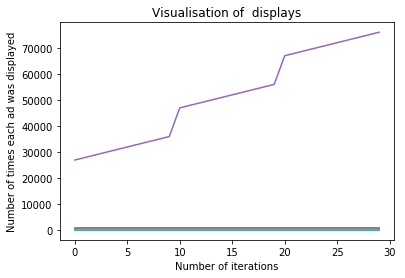

In [57]:
for i in range (0,10):
    plt.plot(d1[i])
    
plt.title('Visualisation of  displays')
plt.xlabel('Number of iterations')
plt.ylabel('Number of times each ad was displayed')
plt.show()

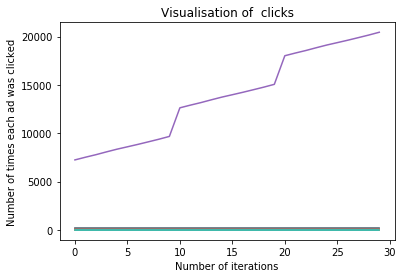

In [58]:
for i in range (0,10):
    plt.plot(d2[i])
    
plt.title('Visualisation of  clicks')
plt.xlabel('Number of iterations')
plt.ylabel('Number of times each ad was clicked')
plt.show()

## Random sampling

Maintenant vous pouvez faire la même chose en choisissant une publicité au hasard random(0,9) 
et comparer les résultats.
Ce qu'il faut surtout comparer c'est le nombre total de clics dans les deux cas.